<a href="https://colab.research.google.com/github/samteotia30/internshipproject.io/blob/main/Climate_Change_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!
🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float6

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


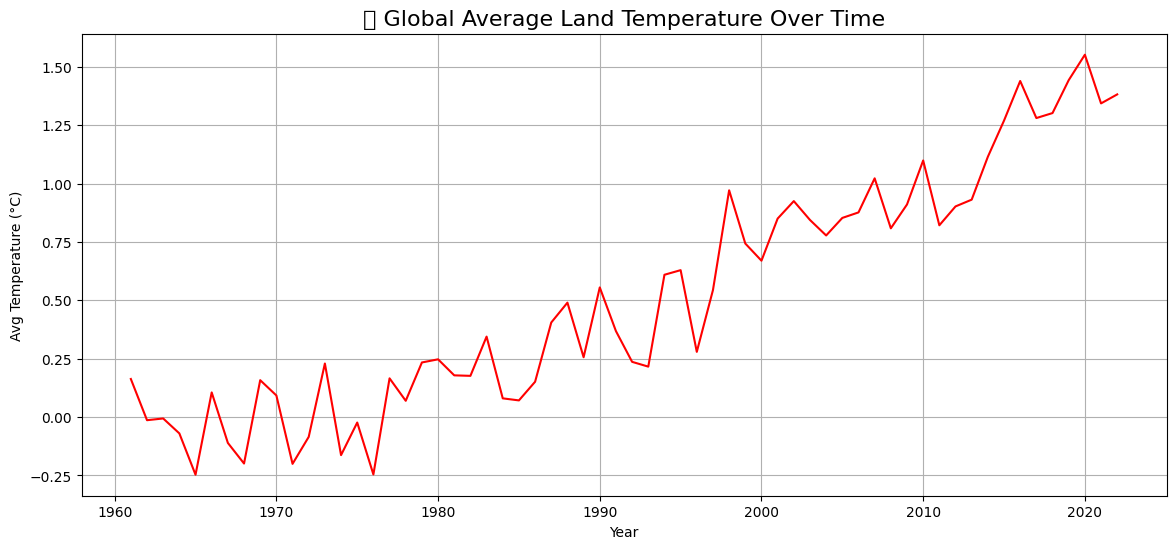

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


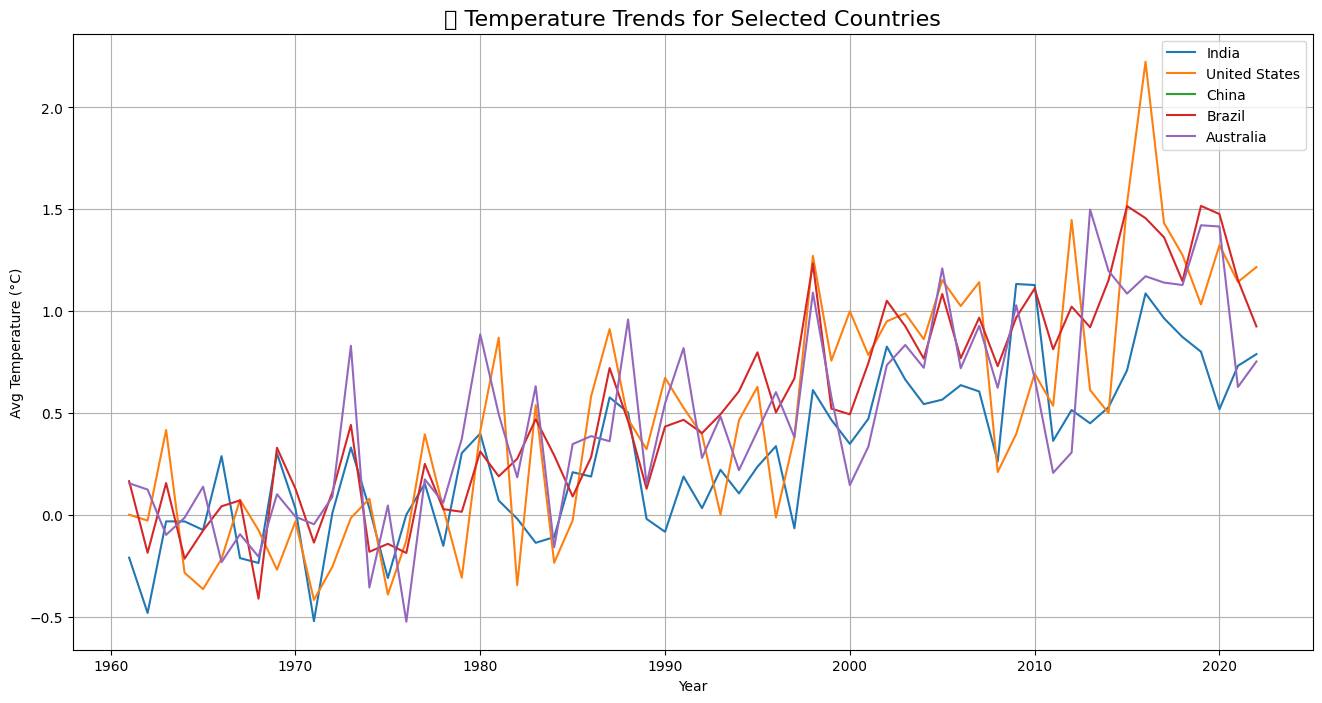

/tmp/ipython-input-1055906966.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=heat_data.index, x=heat_data.values, palette="coolwarm")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


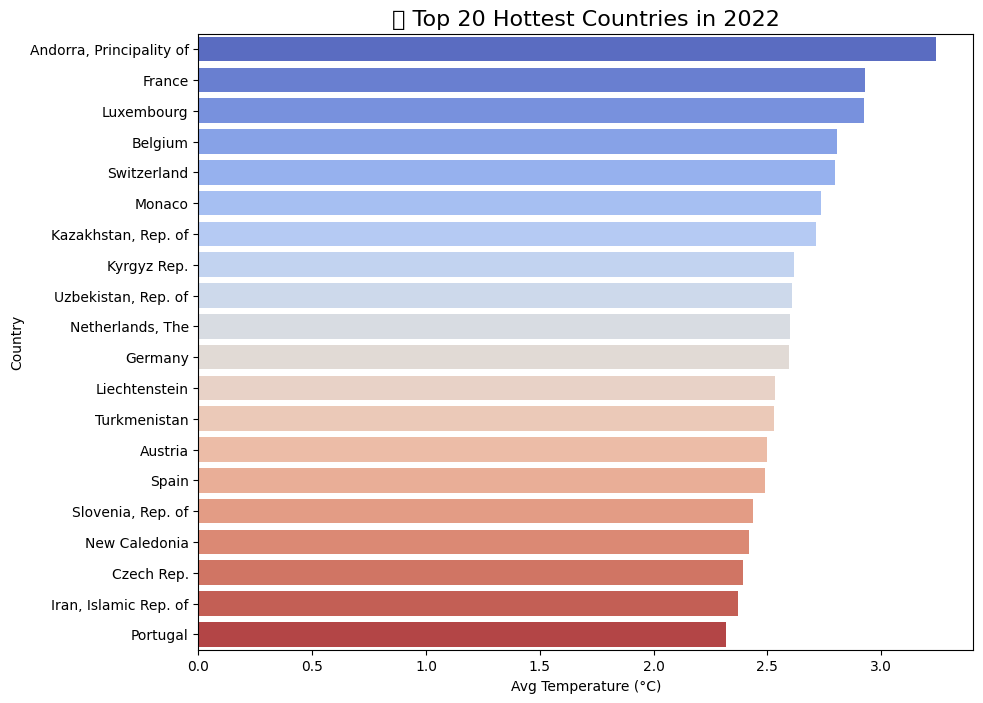

In [ ]:
# 📌 Climate Change Data Analysis in Python (Using Direct Path)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset (🔹 paste your full file path below)
file_path = "/content/climate_change_indicators.csv"   # change this to your file path
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!")
print("🔎 Dataset Info:")
print(df.info())
print("\n📊 First 5 Rows:")
print(df.head())

# Step 2: Data Preprocessing
print("\n🛠️ Data Cleaning...")

# Reshape the data from wide to long format
# Identify year columns (assuming they start with 'F' and are followed by the year)
year_cols = [col for col in df.columns if col.startswith('F')]
id_vars = [col for col in df.columns if col not in year_cols]

df_long = pd.melt(df,
                  id_vars=id_vars,
                  value_vars=year_cols,
                  var_name='Year_Str',
                  value_name='Temperature')

# Extract year from the 'Year_Str' column
df_long['Year'] = df_long['Year_Str'].str.replace('F', '').astype(int)

# Remove rows with missing temperature values
df_cleaned = df_long.dropna(subset=['Temperature']).copy()

print("✅ Data Cleaned")

# Step 3: Global Temperature Trends
plt.figure(figsize=(14,6))
global_temp = df_cleaned.groupby('Year')['Temperature'].mean()
plt.plot(global_temp.index, global_temp.values, color='red')
plt.title("🌍 Global Average Land Temperature Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.show()

# Step 4: Country-wise Temperature Trends
plt.figure(figsize=(16,8))
country_temp = df_cleaned.groupby(['Year','Country'])['Temperature'].mean().reset_index()
top_countries = ['India','United States','China','Brazil','Australia']
for country in top_countries:
    data = country_temp[country_temp['Country'] == country]
    plt.plot(data['Year'], data['Temperature'], label=country)

plt.title("📈 Temperature Trends for Selected Countries", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Heatmap of Countries (Latest Year Available)
latest_year = df_cleaned['Year'].max()
heat_data = df_cleaned[df_cleaned['Year'] == latest_year].groupby('Country')['Temperature'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(y=heat_data.index, x=heat_data.values, palette="coolwarm")
plt.title(f"🔥 Top 20 Hottest Countries in {latest_year}", fontsize=16)
plt.xlabel("Avg Temperature (°C)")
plt.show()